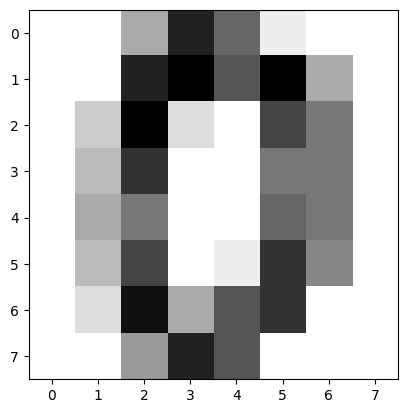

In [8]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
    

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [9]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2)

0.9833333333333333
[8]


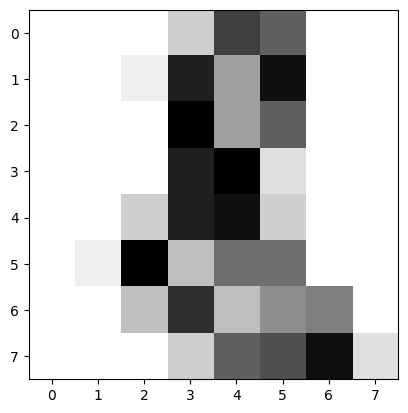

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=6)

# 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하고 무엇으로 예측하였는지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = clf.predict([X_test[10]])
print(y_pred)

0.8333333333333334
[1]


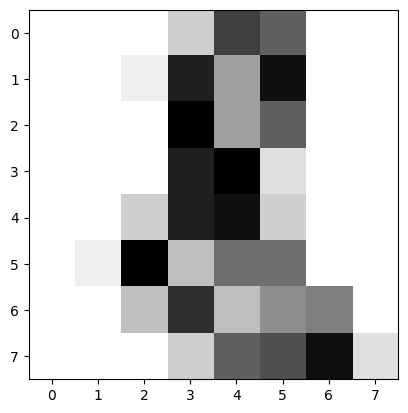

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

# 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하고 무엇으로 예측하였는지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = clf.predict([X_test[10]])
print(y_pred)

0.9694444444444444
[8]


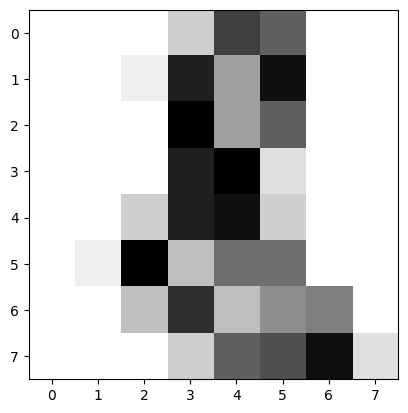

In [12]:
# random forest 인공지능 모델을 생성하고 모델을 훈련, 예측, 결과값 출력

# RandomForestClassifier : 데이터셋에 사용할 Random Forest 모델을 생성하는 함수
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

# 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하고 무엇으로 예측하였는지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = clf.predict([X_test[10]])
print(y_pred)

0.9583333333333334
[8]


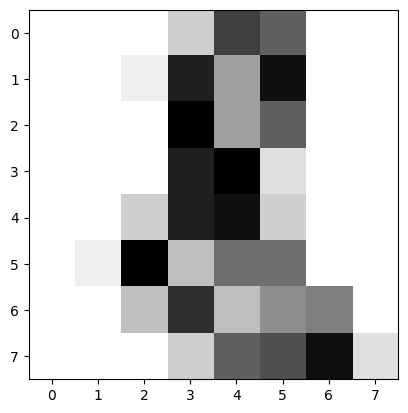

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=0)

# 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하고 무엇으로 예측하였는지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = clf.predict([X_test[10]])
print(y_pred)

C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9472222222222222


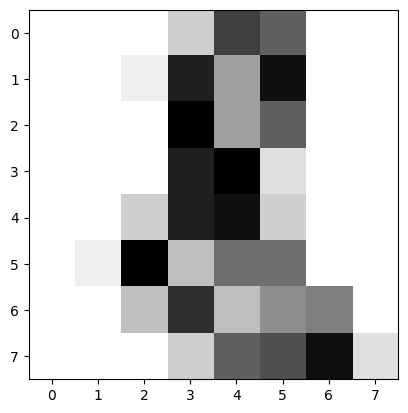

In [14]:
from sklearn.linear_model import LogisticRegression
import numpy as np

clf = LogisticRegression()

# 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하고 무엇으로 예측하였는지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = clf.predict([X_test[10]])